In [28]:
library(rpart)
library(rpart.plot)

ERROR: Error in library(rpart.plot): there is no package called ‘rpart.plot’


In [52]:
meteo = c('soleil','soleil','soleil','soleil','nuages','nuages','nuages','nuages','soleil')
amis = c('présents','absents', 'présents', 'absents', 'absents', 'présents', 'absents', 'présents','absents')
vent = c('faible','fort','fort','faible','faible','fort','fort','faible','faible')
jour = c('week-end', 'semaine', 'semaine', 'semaine', 'week-end', 'week-end', 'semaine', 'week-end', 'week-end')
decision = c('oui', 'non', 'non', 'oui', 'non', 'non','non', 'oui', 'non')

In [24]:
meteo2 = c('soleil', 'nuages', 'soleil', 'soleil', 'nuages')
amis2 = c('présents', 'absents', 'absents', 'absents', 'présents')
vent2 = c('fort', 'faible', 'faible', 'faible', 'faible')
jour2 = c('week-end', 'semaine', 'week-end', 'semaine', 'semaine')
decision2= c('non', 'non', 'oui', 'non', 'oui')

In [7]:
meteo_h =(-2/5*log2(2/5)-3/5*log2(3/5))*5/9 + (-3/4*log2(3/4)-1/4*log2(1/4))*4/9
meteo_h

[1] 0.8999851

In [8]:
amis_h = (-2/4*log2(2/4)-2/4*log2(2/4))*4/9 + (-3/5*log2(3/5)-2/5*log2(2/5))*5/9
amis_h

[1] 0.9838614

In [10]:
vent_h = (-3/5*log2(3/5) - 2/5*log2(2/5))*5/9 + (-1*log2(1))*4/9
vent_h

[1] 0.539417

In [12]:
jour_h = (-2/5*log2(2/5) - 3/5*log2(3/5))*5/9 + (-3/4*log2(3/4) - 1/4*log2(1/4))*4/9
jour_h

[1] 0.8999851

In [15]:
meteo_vent_faible_h = (-1/3*log2(1/3)-2/3*log2(2/3))*3/5 + (-1/2*log2(1/2)-1/2*log2(1/2))*2/5
meteo_vent_faible_h

[1] 0.9509775

In [14]:
amis_vent_faible_h = (-1*log2(1))*2/5 + (-1/3*log2(1/3)-2/3*log2(2/3))*3/5
amis_vent_faible_h

[1] 0.5509775

In [16]:
jour_vent_faible_h = (-2/4*log2(2/4)-2/4*log2(2/4))*4/5 + (-1*log2(1))*1/5
jour_vent_faible_h

[1] 0.8

In [19]:
 meteo_vent_faible_amis_absents_h = (-1/3*log2(1/3)-2/3*log2(2/3))*2/3
meteo_vent_faible_amis_absents_h

[1] 0.6121972

In [20]:
jour_vent_faible_amis_absents_h = (-1*log2(1))*1/3 +(-1*log2(1))*2/3
jour_vent_faible_amis_absents_h

[1] 0

In [53]:
table = data.frame(meteo,amis,vent,jour,decision)
table

meteo,amis,vent,jour,decision
<fct>,<fct>,<fct>,<fct>,<fct>
soleil,présents,faible,week-end,oui
soleil,absents,fort,semaine,non
soleil,présents,fort,semaine,non
soleil,absents,faible,semaine,oui
nuages,absents,faible,week-end,non
nuages,présents,fort,week-end,non
nuages,absents,fort,semaine,non
nuages,présents,faible,week-end,oui
soleil,absents,faible,week-end,non


In [35]:
install.packages('rpart.plot')
library(rpart.plot)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [56]:
tree = rpart(decision~., data = table, method='class', control=rpart.control(minsplit=2,cp=0))
tree

n= 9 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 9 3 non (0.6666667 0.3333333)  
   2) vent=fort 4 0 non (1.0000000 0.0000000) *
   3) vent=faible 5 2 oui (0.4000000 0.6000000)  
     6) amis=absents 3 1 non (0.6666667 0.3333333)  
      12) jour=week-end 2 0 non (1.0000000 0.0000000) *
      13) jour=semaine 1 0 oui (0.0000000 1.0000000) *
     7) amis=présents 2 0 oui (0.0000000 1.0000000) *

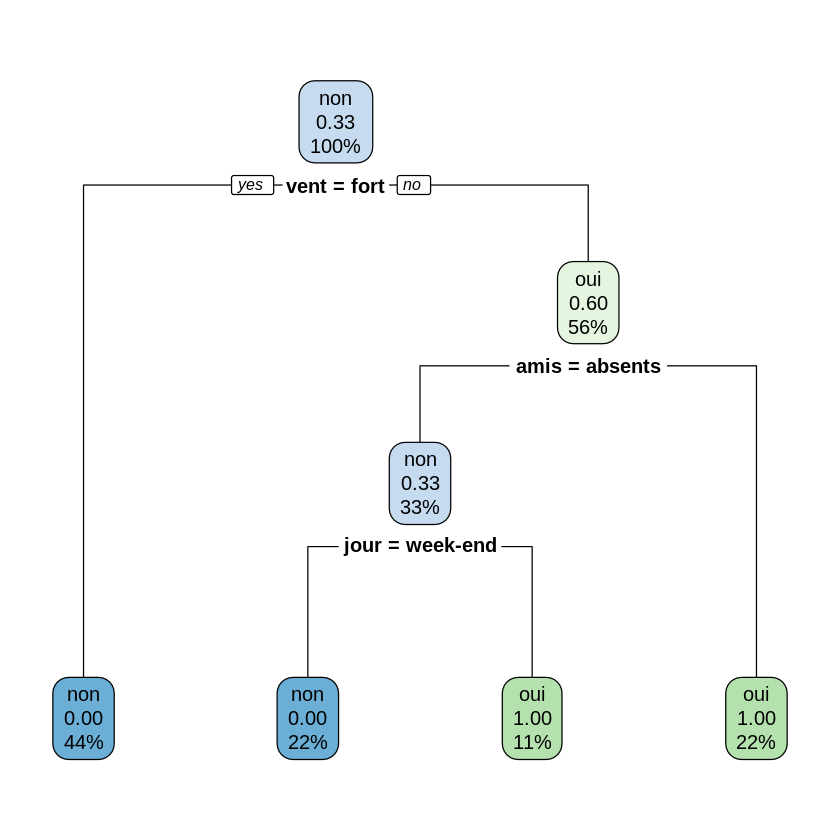

In [58]:
rpart.plot(tree)